In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#read data
df = pd.read_csv('data.csv')

df = df.drop('customer_id', axis=1)
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [2]:
#DETECT AND HANDLE MISSING VALUES AND DULICATES
print(df.isnull().sum())
print("Duplication: " , df.duplicated().sum())

credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64
Duplication:  0


In [3]:
#outliers detection
""" for column in df.select_dtypes(include=('number')):
    plt.figure(figsize=(8,4))
    sns.boxplot(x=column, data=df)
    plt.show() """

" for column in df.select_dtypes(include=('number')):\n    plt.figure(figsize=(8,4))\n    sns.boxplot(x=column, data=df)\n    plt.show() "

credit_score
False    9985
True       15
Name: count, dtype: int64


<Axes: xlabel='credit_score'>

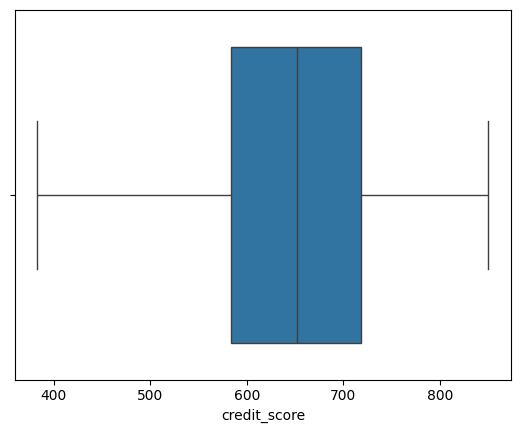

In [4]:
#outliers in credit_score and handling them
#IQR method Credit score
Q1 = df["credit_score"].quantile(0.25)
Q3 = df["credit_score"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
outliers = (df['credit_score'] > upper_bound) | (df["credit_score"] < lower_bound)
print(outliers.value_counts())

#Feature Engineering
df["low_credit_score"] = 0
df.loc[df["credit_score"] < lower_bound, "low_credit_score"] = 1

df.loc[outliers, "credit_score"] = df["credit_score"].clip(lower_bound)
sns.boxplot(x=df['credit_score'])
#plt.show()

In [5]:
#age outliers
Q1 = df["age"].quantile(0.25)
Q3 = df["age"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
outliers = (df['age'] > upper_bound) | (df["age"] < lower_bound)
print(outliers.value_counts())
df["is_Elderly"] = 0
df.loc[(df["age"] > upper_bound), "is_Elderly"] = 1
df.loc[outliers, "age"] = df["age"].clip(lower_bound, upper_bound)



age
False    9641
True      359
Name: count, dtype: int64


,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,low_credit_score,is_Elderly
58,511,Spain,Female,62,4,0.00,1,1,0,1643.11,1,0,1
85,652,Spain,Female,62,10,0.00,2,1,1,114675.75,0,0,1
104,670,Spain,Female,62,1,0.00,1,1,1,177655.68,1,0,1
158,646,France,Female,62,6,97259.25,1,0,1,104719.66,0,0,1
181,510,France,Male,62,2,0.00,2,1,1,48071.61,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9753,656,Germany,Male,62,7,153545.11,1,1,1,186574.68,0,0,1
9765,445,France,Male,62,2,136770.67,1,0,1,43678.06,0,0,1
9832,595,Germany,Female,62,2,105736.32,1,1,1,89935.73,1,0,1
9894,521,France,Female,62,6,0.00,2,1,1,49054.10,0,0,1


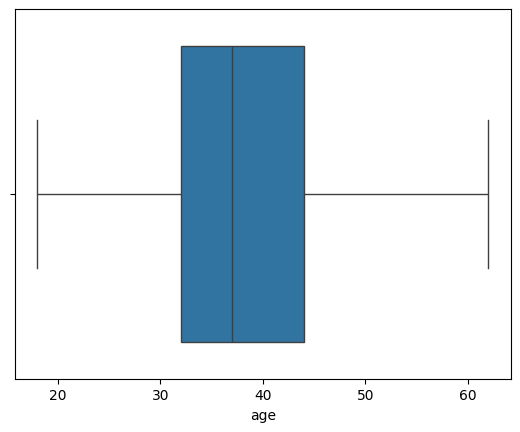

In [6]:
df['age'].describe()
sns.boxplot(x=df['age'])
#plt.show()
df.head(3)
df[df['is_Elderly'] == 1]

In [7]:


df["vip_customer"] = 0
df.loc[(df["balance"] > df["balance"].quantile(0.70)) & (df["credit_score"] > df["credit_score"].quantile(0.70)) & (df["active_member"] == 1) & (df["credit_card"] >= 1), "vip_customer"] = 1
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
 11  low_credit_score  10000 non-null  int64  
 12  is_Elderly        10000 non-null  int64  
 13  vip_customer      10000 non-null  int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 1.1+ MB


In [8]:
#encoding categorical variables
df = pd.get_dummies(df,columns=['country'] ,prefix='country',dtype=int)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   gender            10000 non-null  object 
 2   age               10000 non-null  int64  
 3   tenure            10000 non-null  int64  
 4   balance           10000 non-null  float64
 5   products_number   10000 non-null  int64  
 6   credit_card       10000 non-null  int64  
 7   active_member     10000 non-null  int64  
 8   estimated_salary  10000 non-null  float64
 9   churn             10000 non-null  int64  
 10  low_credit_score  10000 non-null  int64  
 11  is_Elderly        10000 non-null  int64  
 12  vip_customer      10000 non-null  int64  
 13  country_France    10000 non-null  int64  
 14  country_Germany   10000 non-null  int64  
 15  country_Spain     10000 non-null  int64  
dtypes: float64(2), int64(13), object(1)
memor

In [9]:
df.head(5)

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,low_credit_score,is_Elderly,vip_customer,country_France,country_Germany,country_Spain
0,619,Female,42,2,0.00,1,1,1,101348.88,1,0,0,0,1,0,0
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,0,0,0,1
2,502,Female,42,8,159660.80,3,1,0,113931.57,1,0,0,0,1,0,0
3,699,Female,39,1,0.00,2,0,0,93826.63,0,0,0,0,1,0,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1,0,0,1


In [10]:
#gender
from sklearn.preprocessing import LabelEncoder
laben_encoder = LabelEncoder()
df["gender"] = laben_encoder.fit_transform(df["gender"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   gender            10000 non-null  int64  
 2   age               10000 non-null  int64  
 3   tenure            10000 non-null  int64  
 4   balance           10000 non-null  float64
 5   products_number   10000 non-null  int64  
 6   credit_card       10000 non-null  int64  
 7   active_member     10000 non-null  int64  
 8   estimated_salary  10000 non-null  float64
 9   churn             10000 non-null  int64  
 10  low_credit_score  10000 non-null  int64  
 11  is_Elderly        10000 non-null  int64  
 12  vip_customer      10000 non-null  int64  
 13  country_France    10000 non-null  int64  
 14  country_Germany   10000 non-null  int64  
 15  country_Spain     10000 non-null  int64  
dtypes: float64(2), int64(14)
memory usage: 1.

In [11]:
df.head(3)

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,low_credit_score,is_Elderly,vip_customer,country_France,country_Germany,country_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0,0,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0,0,1,0,0


In [12]:
# Feature engineering
df["IsActiveWithbalance"] = 0
df.loc[(df["active_member"]==1) & (df["balance"]>0), "IsActiveWithbalance"]=1

df["IsActiveWithoutbalance"] = 0
df.loc[(df["active_member"]==1) & (df["balance"]==0), "IsActiveWithoutbalance"]=1

df["InactiveWithoutbalance"] = 0
df.loc[(df["active_member"]==0) & (df["balance"]==0), "InactiveWithoutbalance"]=1

In [13]:
#saving new csv
df.to_csv('cleaned_data.csv', index=False)

Text(0.5, 1.0, 'Correlation Matrix')

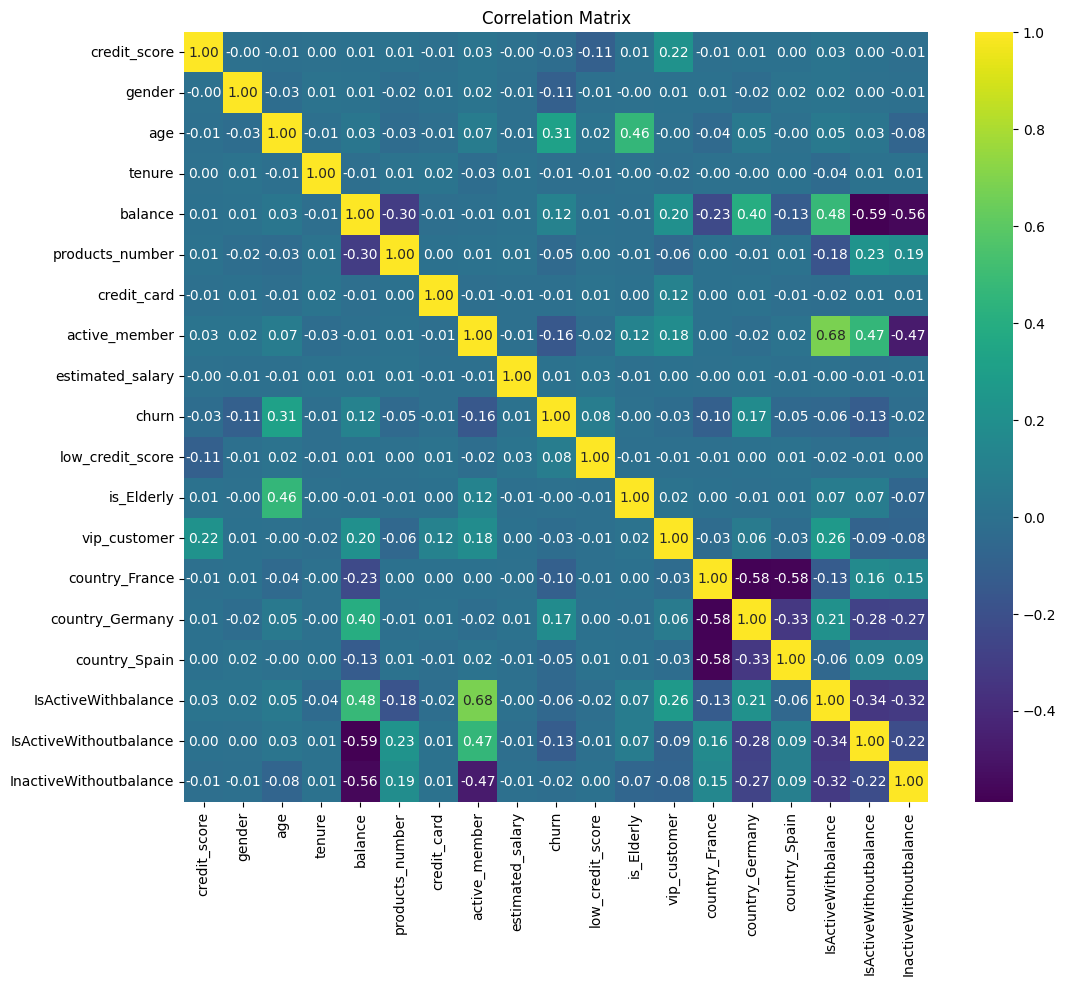

In [14]:

#correlation matrix
plt.figure(figsize=(12,10))
correlation_matrix = df.corr().select_dtypes(include=['number'])
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='viridis')
plt.title("Correlation Matrix")
#plt.show()

In [15]:
#Feature Selection using Chi-Squared Test
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = df.drop(columns=["churn"],axis=1)
y = df["churn"]
X_scaled = scaler.fit_transform(x)
chi_scores = chi2(X_scaled,y)
print(chi_scores)


(array([5.22156438e-01, 5.15399263e+01, 1.01998366e+02, 3.27053797e-01,
       2.85028187e+01, 4.86342534e+00, 1.50040970e-01, 1.18199414e+02,
       2.41805475e-01, 5.86377025e+01, 2.82677420e-04, 7.61018334e+00,
       5.49237052e+01, 2.25464426e+02, 2.08672058e+01, 2.38996496e+01,
       1.33682426e+02, 4.39311942e+00]), array([4.69923254e-01, 7.01557451e-13, 5.55675698e-24, 5.67399091e-01,
       9.35621786e-08, 2.74318216e-02, 6.98496209e-01, 1.56803624e-27,
       6.22905136e-01, 1.89549169e-14, 9.86585788e-01, 5.80395825e-03,
       1.25300579e-13, 5.81457176e-51, 4.92250487e-06, 1.01490235e-06,
       6.41125173e-31, 3.60842348e-02]))


<Axes: >

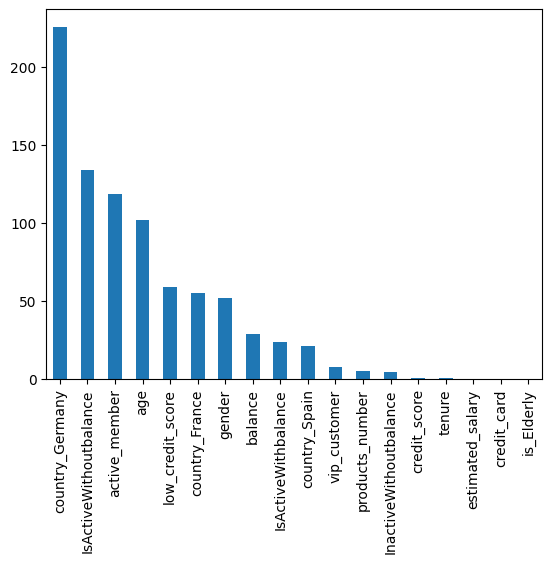

In [16]:
#the higher the more important
chi_values =pd.Series(chi_scores[0],index=x.columns)
chi_values.sort_values(ascending=False,inplace=True)
chi_values.plot.bar()
#plt.show()

<Axes: >

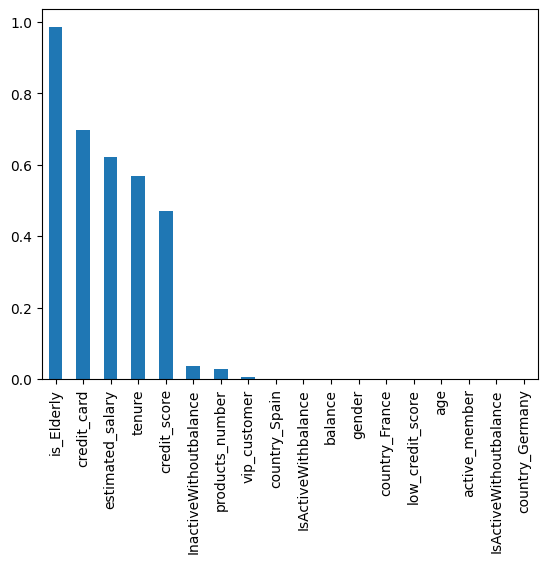

In [17]:
#p-values higher the less important
p_values =pd.Series(chi_scores[1],index=x.columns)
p_values.sort_values(ascending=False,inplace=True)
p_values.plot.bar()
#plt.show()

Text(0.5, 1.0, 'Mutual Information Feature Importance')

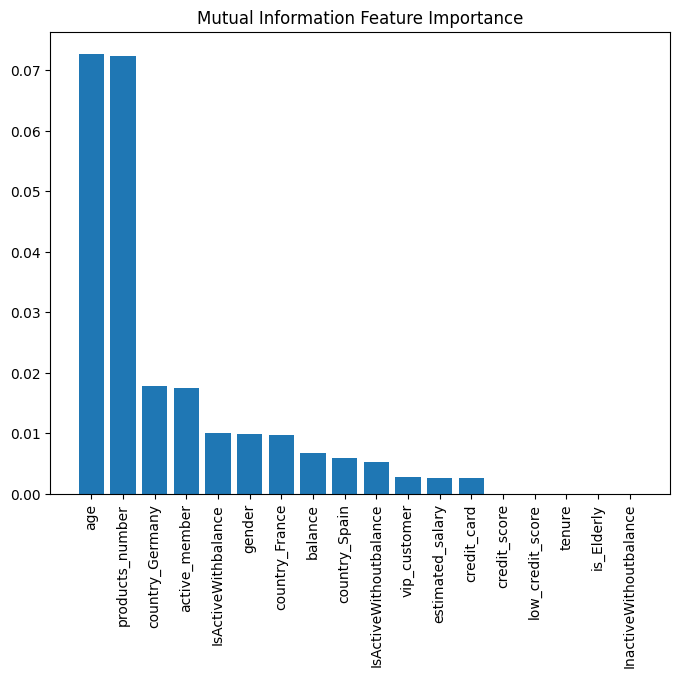

In [18]:
#Feature Selection using Mutual Information
from sklearn.feature_selection import mutual_info_classif
mi_scores = mutual_info_classif(x,y,discrete_features='auto')
mi_df = pd.DataFrame({'df': x.columns, 'MI Score': mi_scores})
mi_df = mi_df.sort_values(by='MI Score', ascending=False)
plt.figure(figsize=(8,6))
plt.bar(mi_df['df'], mi_df['MI Score'])
plt.xticks(rotation=90)
plt.title("Mutual Information Feature Importance")
#plt.show()

Text(0.5, 1.0, 'Random Forest df Importance')

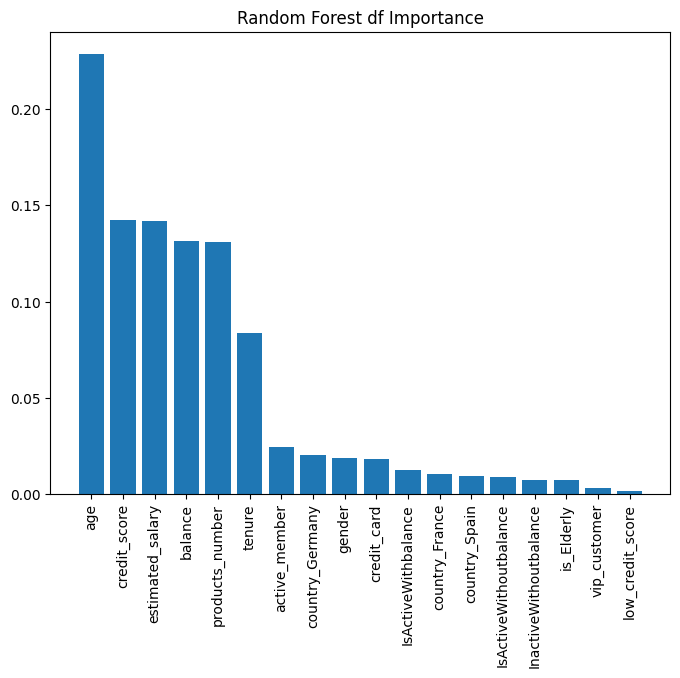

In [19]:
#Feature Selection using Random Forest
from sklearn.ensemble import RandomForestClassifier

X = df.drop("churn", axis=1)
y = df["churn"]

model = RandomForestClassifier(random_state=42)
model.fit(X, y)
importances = model.feature_importances_
rf_df = pd.DataFrame({
    'df': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Visualize
plt.figure(figsize=(8,6))
plt.bar(rf_df['df'], rf_df['Importance'])
plt.xticks(rotation=90)
plt.title("Random Forest df Importance")
#plt.show()

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

features = ['age', 'credit_score', 'estimated_salary', 'balance', 'products_number', 'active_member', 'IsActiveWithbalance', 'IsActiveWithoutbalance', 'low_credit_score', 'is_Elderly', 'vip_customer', 'country_France', 'country_Germany', 'country_Spain', 'gender','InactiveWithoutbalance']


X = df.drop('churn', axis=1)
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

tree = DecisionTreeClassifier(
    max_depth=4,
    random_state=42
)

tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
train_acc = accuracy_score(y_train, tree.predict(X_train))
test_acc  = accuracy_score(y_test,  tree.predict(X_test))
test_auc  = roc_auc_score(y_test, tree.predict_proba(X_test)[:,1])

print(f"Train Accuracy : {train_acc:.4f}")
print(f"Test Accuracy  : {test_acc:.4f}")
print(f"Test AUC       : {test_auc:.4f}")
print(f"Accuracy       : {accuracy:.4f}")

Train Accuracy : 0.8506
Test Accuracy  : 0.8515
Test AUC       : 0.8220
Accuracy       : 0.8515


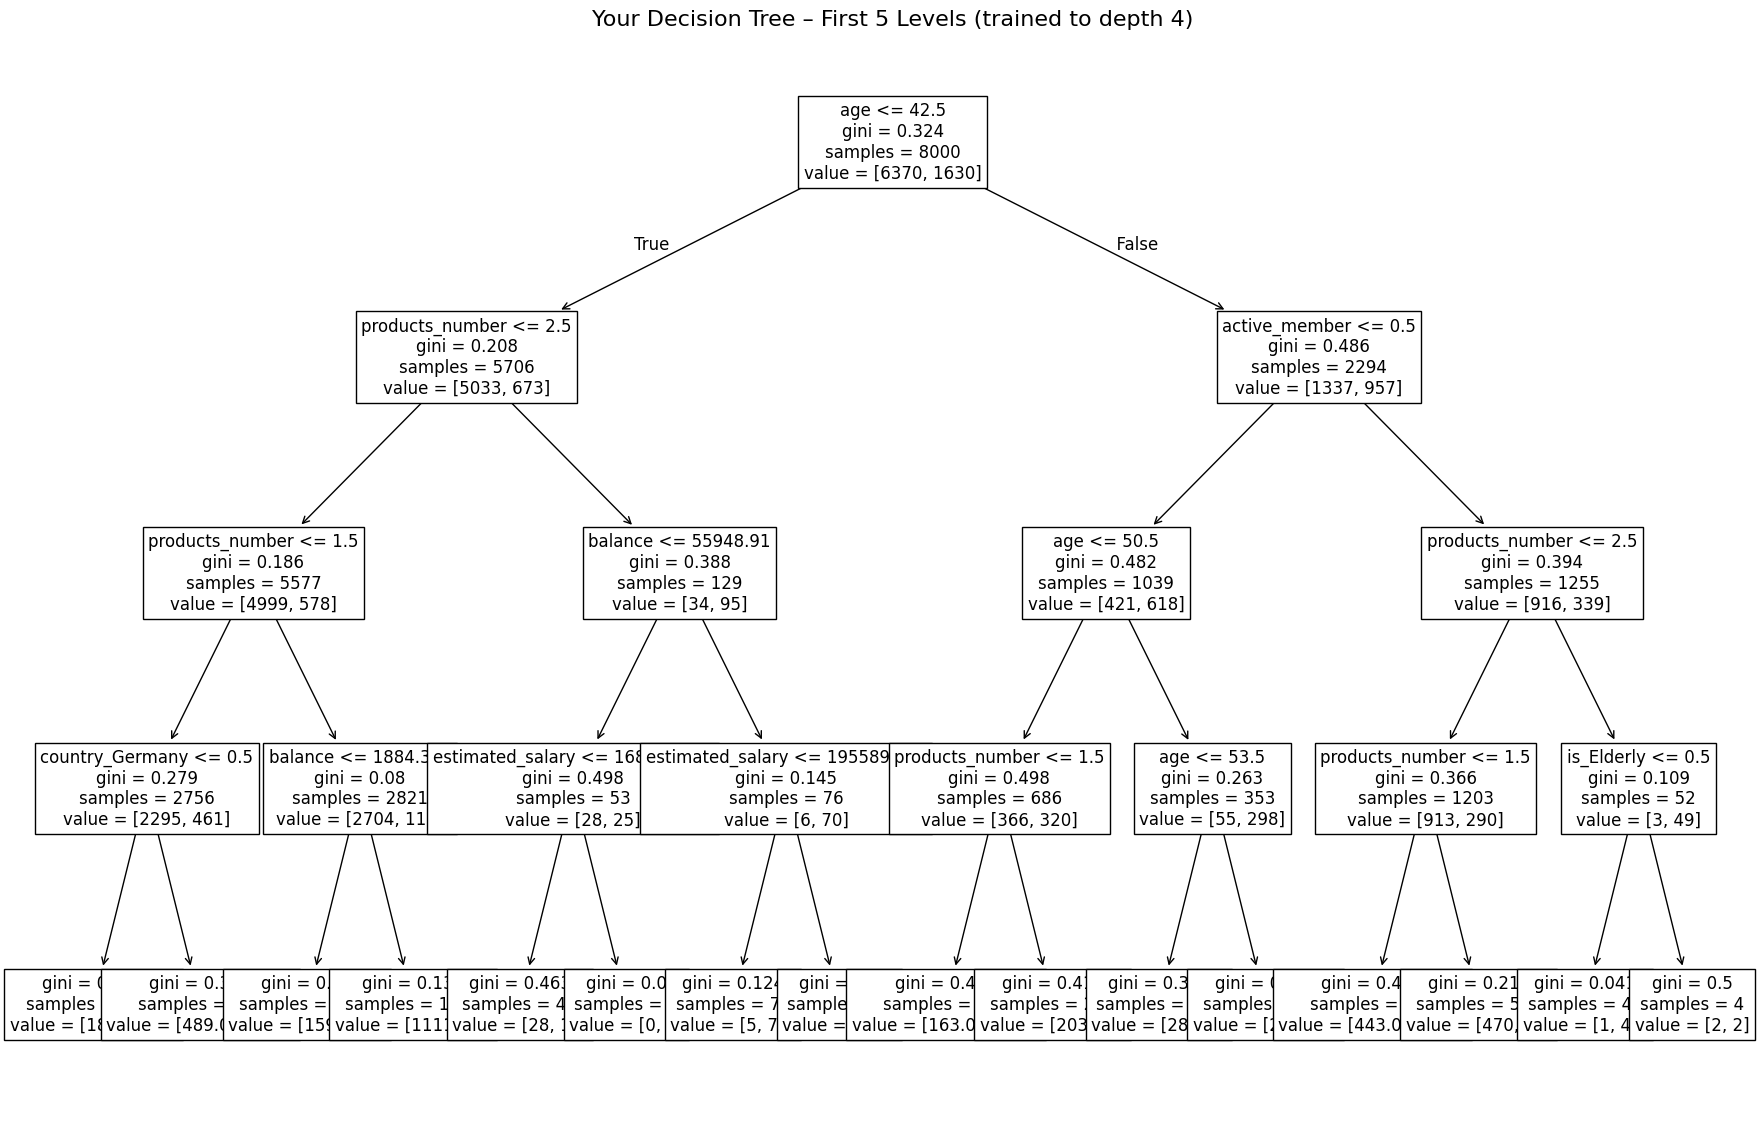

In [21]:
from sklearn.tree import plot_tree


plt.figure(figsize=(22, 14))
plot_tree(
    tree,
    fontsize=12,
    feature_names=X.columns,
    max_depth=4   # ← show only top 4 levels so it fits nicely
)
plt.title("Your Decision Tree – First 5 Levels (trained to depth 4)", fontsize=16)
plt.show()

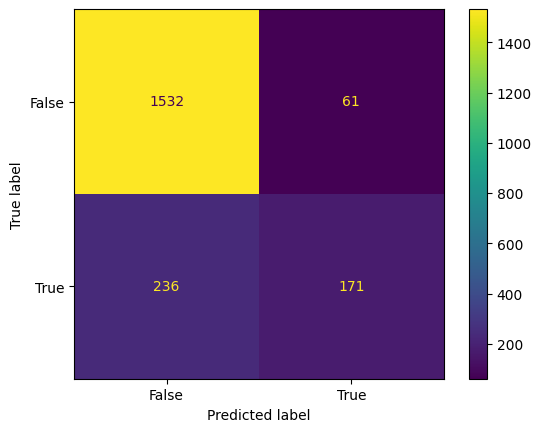

In [22]:
from sklearn import metrics
import numpy as np

actual = y_test
predicted = y_pred
confusion_mtx = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_mtx, display_labels = [False, True])
cm_display.plot()



In [23]:
#Naive Bayes Classifier   Not recommended for this dataset dueto dependent features
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X = df.drop('churn',axis=1)
y = df['churn']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=42)

clf = GaussianNB()
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.82      0.96      0.88      1607
           1       0.46      0.13      0.20       393

    accuracy                           0.80      2000
   macro avg       0.64      0.55      0.54      2000
weighted avg       0.75      0.80      0.75      2000



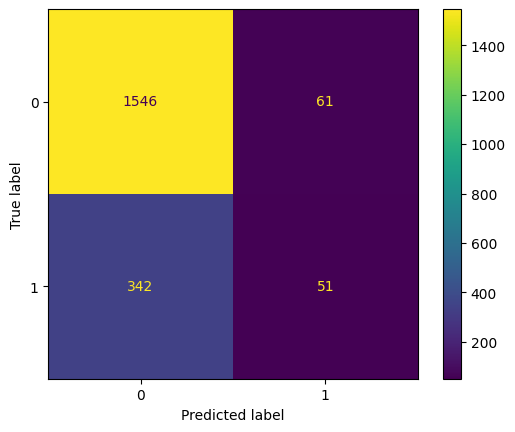

In [24]:
actual = y_test
predicted = y_pred
confusion_mtx = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_mtx)
cm_display.plot()
plt.show()

In [25]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

Lr = LogisticRegression(max_iter=1000)
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=.2,random_state=42)
Lr.fit(X_train,y_train)
y_pred = Lr.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1607
           1       0.64      0.28      0.40       393

    accuracy                           0.83      2000
   macro avg       0.74      0.62      0.65      2000
weighted avg       0.81      0.83      0.80      2000



C:\Users\Surface Laptop 3\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


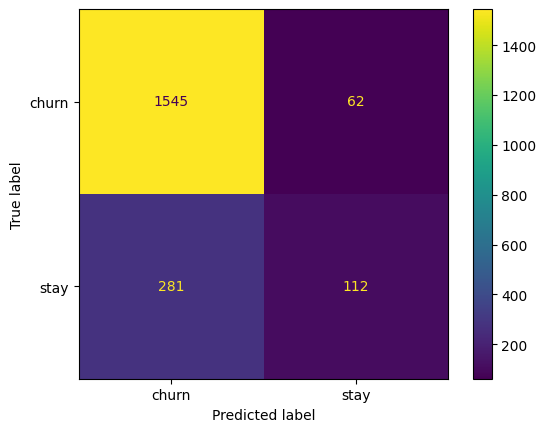

In [26]:
#matrix confusion for logistic regression
from sklearn.metrics import confusion_matrix
cm = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['churn', 'stay'])
cm_display.plot()
plt.show()

In [27]:
#CNN Model  "Neural Netork"
